# Моделирование элементарной нейронной сети с прямым распространением сигнала

## Задание

- Разработать программное обеспечение для реализации элементарной нейронной сети с прямым распространением сигнала и сигмоидальной функцией активации (язык программирования студент выбирает самостоятельно).
- Провести обучение элементарной нейронной сети нейрона.
- Провести распознавание неизвестного образа, для которого x=40.

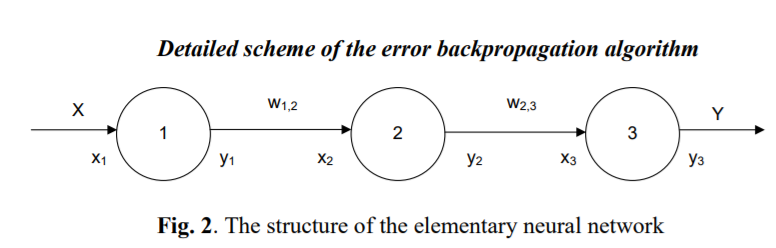

In [1]:
from numpy import exp
from random import sample

In [2]:
class ForwardPropagationNetwork:
    """ Forward propagation neural network with 3 neurons """

    def __init__(self, X, Y, pe, w1, w2):
        """ Initialize neural network """
        self.X  = X  # input
        self.Y  = Y  # output
        self.pe = pe # permissible error
        self.w1 = w1 # first weight
        self.w2 = w2 # second weight


    def sigmoid(self, x):
        """ Sigmoid activation function """
        return 1 / (1 + exp(-x))


    def recognize(self, form):
        """ Recognize unknown form for the given value and return it or raise an exception if a learning error exists """
        
        # find input for the second neuron
        x2_in  = self.w1 * form
        
        # find output for the second neuron
        y2_out = self.sigmoid(x2_in)
        
        # find input for the third neuron
        x3_in  = self.w2 * y2_out
        
        # return output for the third neuron
        y3_out = self.sigmoid(x3_in)
    
        if self.has_learning_error(y3_out):
            raise Exception(f"Oops, there is a learning error of {y3_out:.6f} for the given form: {form:.6f}")
        else:
            return y3_out        


    def has_learning_error(self, y):
        """ Check if the given output has a learning error """
        return abs((self.Y - y) / self.Y) > self.pe
 

    def build_with_bpag(self):
        """ Build neural network using back propagation algorithm """
                
        print("--- Back propagation algorithm for the forward propagation network with 3 neurons ---\n")
        print(f"Initial data: X={self.X:.6f}, Y={self.Y:.6f}, dd={self.pe:.6f}, w12={self.w1:.6f}, w23={self.w2:.6f}\n")
        
        i = 1
        
        while True:
            # find input for the second neuron
            x2_in = self.w1 * self.X

            # find output for the second neuron
            y2_out = self.sigmoid(x2_in)

            # find input for the third neuron
            x3_in = self.w2 * y2_out

            # find output for the third neuron
            y3_out = self.sigmoid(x3_in)
            
            print(f"Epoch: {i:10}, w12: {self.w1:10.6f}, w23: {self.w2:10.6f}")
            
            if not self.has_learning_error(y3_out):
                print(f"\nNetwork parameters: X={self.X:.6f}, Y={self.Y:.6f}, dd={self.pe:.6f}, w12={self.w1:.6f}, w23={self.w2:.6f}")
                print("\n--- Algorithm completed successfully! --- ")
                break
            else:
                # calculate correction parameters
                q3  = y3_out * (1 - y3_out) * (self.Y - y3_out)
                b23 = q3 * y2_out
                q2  = y2_out * (1 - y2_out) * (q3 * self.w2)
                b12 = q2 * self.X
                
                # correct weights by adding calculated biases
                self.w1 += b12
                self.w2 += b23
                i += 1


    def test(self, n=1000):
        """ Test neural network against random data set """
        failed = 0        
        # generate unknown random forms
        for random_form in sample(range(0, n), n):
            try:
                self.recognize(random_form)
            except Exception as ex:
                failed += 1
        
        f_percent = (failed / n) * 100
        print(f"Forms count: {n}, fail: {f_percent:.6f}%, sucess: {(100 - f_percent):.6f}%")

In [3]:
""" define initial values """
X   = 8   # input signal
Y   = 0.3  # expected output signal
dd  = 0.05 # permissible error
w12 = 0.2  # weight (n1 -> n2)
w23 = 0.1  # weight (n2 -> n3)

In [4]:
# create forward propagation neural network with the given parameters
fpn = ForwardPropagationNetwork(X, Y, dd, w12, w23)

In [5]:
# build network using back propagation algorithm
fpn.build_with_bpag()

--- Back propagation algorithm for the forward propagation network with 3 neurons ---

Initial data: X=8.000000, Y=0.300000, dd=0.050000, w12=0.200000, w23=0.100000

Epoch:          1, w12:   0.200000, w23:   0.100000
Epoch:          2, w12:   0.193839, w23:   0.054154
Epoch:          3, w12:   0.190539, w23:   0.010622
Epoch:          4, w12:   0.189908, w23:  -0.030884
Epoch:          5, w12:   0.191670, w23:  -0.070600
Epoch:          6, w12:   0.195491, w23:  -0.108708
Epoch:          7, w12:   0.201004, w23:  -0.145337
Epoch:          8, w12:   0.207839, w23:  -0.180567
Epoch:          9, w12:   0.215639, w23:  -0.214443
Epoch:         10, w12:   0.224081, w23:  -0.246983
Epoch:         11, w12:   0.232883, w23:  -0.278192
Epoch:         12, w12:   0.241818, w23:  -0.308073
Epoch:         13, w12:   0.250703, w23:  -0.336629
Epoch:         14, w12:   0.259404, w23:  -0.363869
Epoch:         15, w12:   0.267826, w23:  -0.389811
Epoch:         16, w12:   0.275907, w23:  -0.414483
Ep

In [6]:
# unknown form
x = 40

In [7]:
# recognize the unknown form
fpn.recognize(x)

0.3073509730468642

In [9]:
# start test
fpn.test(1_000_000)

Forms count: 1000000, fail: 0.000800%, sucess: 99.999200%


* From 1 million randomly generated forms only 8 (0.0008%) were recognized with error.
* It means that our network has 99.9992% accurace for values between 0 and 1 million. 